# Homework #5

- Date: 2024.04.21
- Due Date: 2024.04.28

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Pandas DataFrame

- 판다스(Pandas)는 파이썬에서 데이터 조작과 분석을 위한 라이브러리
    - 주로 테이블 형태의 데이터를 다루는 데 사용(판다스의 핵심 데이터 구조는 DataFrame)
    - DataFrame은 행과 열이 있는 테이블 데이터 구조를 제공
    - 각 열은 서로 다른 유형의 데이터를 포함할 수 있으며, 각 행은 각기 다른 관측치를 나타냄

- 판다스의 DataFrame을 생성하고 조작하는 방법은 매우 다양
    - 일반적으로 CSV 파일, 엑셀 파일, SQL 데이터베이스 등 다양한 소스에서 데이터를 로드하여 DataFrame 활용

In [2]:
# 딕셔너리로부터 DataFrame 생성
data = {
    '이름': ['Alice', 'Bob', 'Charlie', 'David'],
    '나이': [25, 30, 35, 40],
    '성별': ['여', '남', '남', '여']
}

df = pd.DataFrame(data)

print(df)

        이름  나이 성별
0    Alice  25  여
1      Bob  30  남
2  Charlie  35  남
3    David  40  여


In [3]:
# '이름' 열 선택
df['나이']

0    25
1    30
2    35
3    40
Name: 나이, dtype: int64

In [4]:
# 특정 조건을 만족하는 행 제거
df[df['나이']>30]

,이름,나이,성별
2,Charlie,35,남
3,David,40,여


In [5]:
df

,이름,나이,성별
0,Alice,25,여
1,Bob,30,남
2,Charlie,35,남
3,David,40,여


In [6]:
data = {
    '이름': ['Alice', 'Bob', 'Charlie', 'David'],
    '나이': [25, 30, 35, 40],
    '성별': ['여', '남', '남', '여']
}

df = pd.DataFrame(data)

# 제거할 행의 인덱스를 제외한 DataFrame 생성
df.drop([2])

,이름,나이,성별
0,Alice,25,여
1,Bob,30,남
3,David,40,여


- pd.concat() 함수를 사용하여 DataFrame을 연결할 때 ignore_index=True를 설정하면 인덱스가 재설정되어 새로운 DataFrame이 생성됩니다. 이를 이용하여 행을 추가할 수 있습니다. 또한, drop() 메서드를 사용하여 특정 인덱스의 행을 제거할 수 있습니다.

In [7]:
num_list = []

for i in range(10):
    num_list.append(i*3)

In [8]:
num_list

[0, 3, 6, 9, 12, 15, 18, 21, 24, 27]

In [9]:
num_list[3]

9

In [10]:
# 기존 DataFrame 생성
data1 = {
    '이름': ['Alice', 'Bob', 'Charlie'],
    '나이': [25, 30, 35],
    '성별': ['여', '남', '남']
}
df1 = pd.DataFrame(data1)

# 추가할 행 데이터
data2 = {
    '이름': ['David'],
    '나이': [40],
    '성별': ['남']
}
df2 = pd.DataFrame(data2)

# 두 DataFrame을 연결하여 행 추가
pd.concat([df1, df2], ignore_index=True)

,이름,나이,성별
0,Alice,25,여
1,Bob,30,남
2,Charlie,35,남
3,David,40,남


- numpy를 이용한 random 행렬 생성

In [11]:
# 랜덤한 데이터로 DataFrame 생성
df = pd.DataFrame(np.random.rand(5, 3), columns=['A', 'B', 'C'])

In [12]:
df[['A','B']]

,A,B
0,0.565336,0.268709
1,0.530175,0.919357
2,0.036374,0.102105
3,0.487357,0.043939
4,0.868994,0.025289


In [13]:
df.iloc[0]

A    0.565336
B    0.268709
C    0.120204
Name: 0, dtype: float64

In [14]:
# 평균과 표준편차 지정
mu, sigma = 0, 0.1  # 평균(mu)이 0이고 표준편차(sigma)가 0.1인 가우시안 분포

# 난수 생성
data10 = np.random.normal(mu, sigma, 10)
data100 = np.random.normal(mu, sigma, 100)
data1000 = np.random.normal(mu, sigma, 1000)

Question 1. np.random.normal 난수 생성을 이용하여, 임의의 100명의 학생의 국어, 영어, 수학 과목 성적표를 만드시오.
- data[0] = 학번
- data[1] = 국어성적 (0~100점 사이, 평균=73, 표준편차=12.3)
- data[2] = 영어성적 (0~100점 사이, 평균=67, 표준편차=25.8)
- data[3] = 수학성적 (0~100점 사이, 평균=56, 표준편차=32.7)

* 단, 0점 이하의 값이 나오는 경우 0점으로, 100점 이상의 값이 나오는 경우 100점으로 처리

In [15]:
def getScore(mu, sigma, size):
    data = np.random.normal(mu, sigma, size)
    data[data>100] = 100
    data[data<0] = 0

    return data

In [16]:
korean = getScore(73, 12.3, 100)
english = getScore(67, 25.8, 100)
math = getScore(56, 32.7, 100)

In [17]:
korean = np.random.normal(73, 12.3, 100)
korean[korean>100] = 100
korean[korean<0] = 0

english = np.random.normal(67, 25.8, 100)
english[english>100] = 100
english[english<0] = 0

math = np.random.normal(56, 32.7, 100)
math[math>100] = 100
math[math<0] = 0

In [18]:
data = {
    'id': np.arange(1, 101, 1),
    'korean': korean,
    'english': english,
    'math': math
}

df = pd.DataFrame(data)

In [19]:
df

,id,korean,english,math
0,1,83.782175,100.000000,15.424719
1,2,62.053121,93.532650,85.693648
2,3,60.601019,95.253570,100.000000
3,4,62.269725,36.379423,25.026747
4,5,76.721711,66.867605,18.241800
...,...,...,...,...
95,96,61.592363,62.588292,49.101946
96,97,81.316980,59.027189,77.422543
97,98,65.247679,75.887148,77.954530
98,99,73.826178,64.988407,54.690782


Question 2. 5번째 열(mean)을 추가하여, 학생별 평균값을 갖는 데이터를 만들어주세요

In [20]:
average = []

for i in range(len(df)):
    average.append((df['korean'].iloc[i]+df['english'].iloc[i]+df['math'].iloc[i])/3)

In [21]:
df['mean'] = average

In [22]:
df

,id,korean,english,math,mean
0,1,83.782175,100.000000,15.424719,66.402298
1,2,62.053121,93.532650,85.693648,80.426473
2,3,60.601019,95.253570,100.000000,85.284863
3,4,62.269725,36.379423,25.026747,41.225298
4,5,76.721711,66.867605,18.241800,53.943705
...,...,...,...,...,...
95,96,61.592363,62.588292,49.101946,57.760867
96,97,81.316980,59.027189,77.422543,72.588904
97,98,65.247679,75.887148,77.954530,73.029786
98,99,73.826178,64.988407,54.690782,64.501789


In [23]:
score = df.drop(columns=['id'])
df['mean'] = score.mean(axis=1)

In [24]:
df

,id,korean,english,math,mean
0,1,83.782175,100.000000,15.424719,66.402298
1,2,62.053121,93.532650,85.693648,80.426473
2,3,60.601019,95.253570,100.000000,85.284863
3,4,62.269725,36.379423,25.026747,41.225298
4,5,76.721711,66.867605,18.241800,53.943705
...,...,...,...,...,...
95,96,61.592363,62.588292,49.101946,57.760867
96,97,81.316980,59.027189,77.422543,72.588904
97,98,65.247679,75.887148,77.954530,73.029786
98,99,73.826178,64.988407,54.690782,64.501789


Question 3. 6번째 열(rank)을 추가하여, 등수를 구해주세요.

In [25]:
df

,id,korean,english,math,mean
0,1,83.782175,100.000000,15.424719,66.402298
1,2,62.053121,93.532650,85.693648,80.426473
2,3,60.601019,95.253570,100.000000,85.284863
3,4,62.269725,36.379423,25.026747,41.225298
4,5,76.721711,66.867605,18.241800,53.943705
...,...,...,...,...,...
95,96,61.592363,62.588292,49.101946,57.760867
96,97,81.316980,59.027189,77.422543,72.588904
97,98,65.247679,75.887148,77.954530,73.029786
98,99,73.826178,64.988407,54.690782,64.501789


In [26]:
df['rank'] = df.rank(axis=0, ascending=False)['mean']

In [27]:
df

,id,korean,english,math,mean,rank
0,1,83.782175,100.000000,15.424719,66.402298,46.0
1,2,62.053121,93.532650,85.693648,80.426473,13.0
2,3,60.601019,95.253570,100.000000,85.284863,5.0
3,4,62.269725,36.379423,25.026747,41.225298,98.0
4,5,76.721711,66.867605,18.241800,53.943705,84.0
...,...,...,...,...,...,...
95,96,61.592363,62.588292,49.101946,57.760867,75.0
96,97,81.316980,59.027189,77.422543,72.588904,28.0
97,98,65.247679,75.887148,77.954530,73.029786,26.0
98,99,73.826178,64.988407,54.690782,64.501789,54.0


In [28]:
df.sort_values(by='mean', ascending=False)

,id,korean,english,math,mean,rank
79,80,100.000000,76.405875,100.000000,92.135292,1.0
23,24,80.867864,87.536228,100.000000,89.468031,2.0
19,20,69.871292,94.740060,98.108401,87.573251,3.0
36,37,78.768867,83.691066,96.695347,86.385093,4.0
2,3,60.601019,95.253570,100.000000,85.284863,5.0
...,...,...,...,...,...,...
84,85,87.996840,41.130088,0.000000,43.042309,96.0
15,16,88.675676,26.546903,13.686491,42.969690,97.0
3,4,62.269725,36.379423,25.026747,41.225298,98.0
52,53,49.986859,55.479297,15.978925,40.481694,99.0


- stock.csv로부터 데이터 불러오기
    - index: Ticker Symbol for Indexes
    - Date: Date of Observation
    - Open: Opening Price
    - High: Highest price during trading day
    - Low: Lowest price during trading day
    - Close: Close price adjusted for splits
    - Adj Close: Adjusted close price adjusted for both dividends and splits
    - Volume: Number of shares traded during trading day

In [29]:
data = pd.read_csv("../data/stock.csv")

In [30]:
info = pd.read_csv("../data/stockInfo.csv")

In [31]:
info

,Region,Exchange,Index,Currency
0,United States,New York Stock Exchange,NYA,USD
1,United States,NASDAQ,IXIC,USD
2,Hong Kong,Hong Kong Stock Exchange,HSI,HKD
3,China,Shanghai Stock Exchange,000001.SS,CNY
4,Japan,Tokyo Stock Exchange,N225,JPY
5,Europe,Euronext,N100,EUR
6,China,Shenzhen Stock Exchange,399001.SZ,CNY
7,Canada,Toronto Stock Exchange,GSPTSE,CAD
8,India,National Stock Exchange of India,NSEI,INR
9,Germany,Frankfurt Stock Exchange,GDAXI,EUR


Stock 'Index'
- ['NYA', 'IXIC', 'HSI', '000001.SS', 'GSPTSE', '399001.SZ', 'NSEI','GDAXI', 'KS11', 'SSMI', 'TWII', 'J203.JO', 'N225', 'N100']

In [32]:
data_NYA = data[data['Index']=="NYA"]
data_IXIC = data[data['Index']=="IXIC"]
data_HSI = data[data['Index']=="HSI"]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


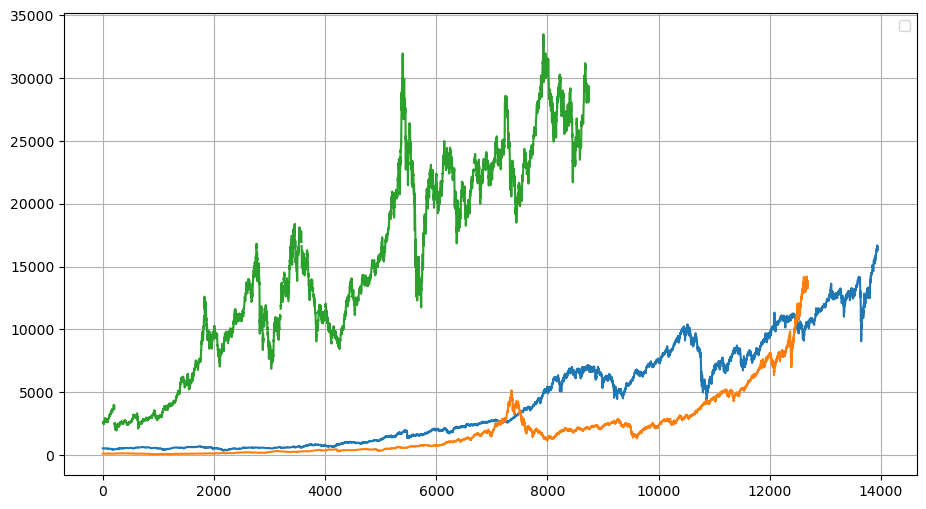

In [33]:
plt.figure(figsize=(11,6))
plt.plot(np.arange(0, len(data_NYA), 1), data_NYA['High'])
plt.plot(np.arange(0, len(data_IXIC), 1), data_IXIC['High'])
plt.plot(np.arange(0, len(data_HSI), 1), data_HSI['High'])
plt.grid()
plt.legend()

이동평균(Moving Average) =  데이터의 이동하는 평균값을 계산하는데 사용되는 방법(주어진 기간의 데이터를 사용하여 해당 기간 동안의 평균을 계산하는 방법)

- 여기서는 pandas의 rolling() 메서드를 사용하여 이동평균을 계산하는 방법

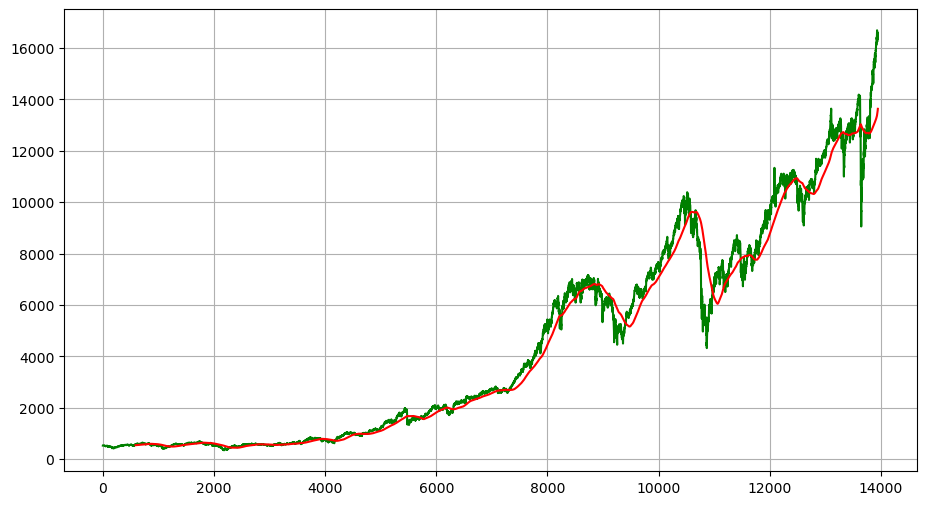

In [34]:
series = data_NYA['High']
window_size = 300  # 이동평균을 계산할 기간
moving_average = series.rolling(window=window_size).mean()

plt.figure(figsize=(11,6))
plt.plot(np.arange(0, len(data_NYA), 1), data_NYA['High'], color='green')
plt.plot(np.arange(0, len(data_NYA), 1), moving_average, color='red')
plt.grid()

Homework

- 위의 그림을 rolling.mean() 메소드를 사용하지 않고, 직접 구현해보기

In [35]:
series = data_NYA['High']
window_size = 100  # 이동평균을 계산할 기간

moving_average = []

for i in range(len(series)-window_size):
    moving_average.append(np.mean(series[i:i+window_size]))

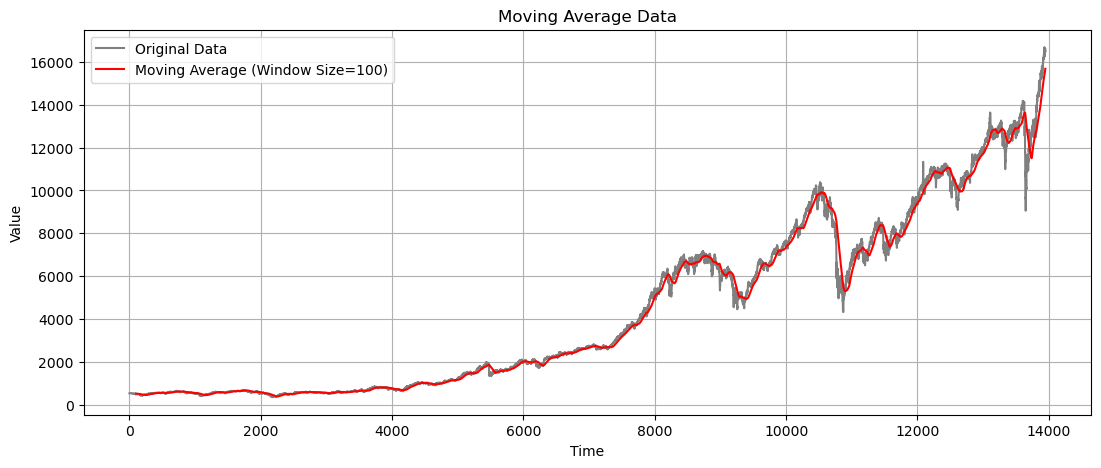

In [36]:
# 시각화
plt.figure(figsize=(13,5))
plt.plot(series, label='Original Data', color='gray')
plt.plot(np.arange(100, len(series), 1), moving_average, label=f'Moving Average (Window Size={window_size})', color='red')
plt.legend(loc='upper left')
plt.title('Moving Average Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid()

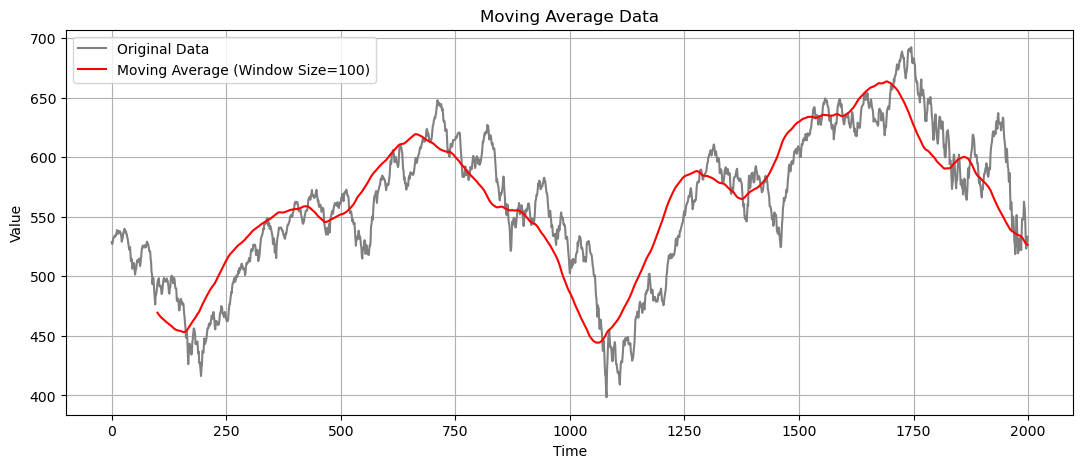

In [37]:
# 시각화
plt.figure(figsize=(13,5))
plt.plot(series[0:2000], label='Original Data', color='gray')
plt.plot(np.arange(100, 2000, 1), moving_average[100:2000], label=f'Moving Average (Window Size={window_size})', color='red')
plt.legend(loc='upper left')
plt.title('Moving Average Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid()